In [1]:
from collections import Counter
import os

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import metrics
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
ROOT_PATH = '/'.join(os.getcwd().split('/')[:-3])
DATA_PATH = f'{ROOT_PATH}/AI_study/dataset/Pocker'

idx2suit  = {1 : 'H', 2: 'S', 3 : 'D', 4 : 'C'}

In [3]:
df = pd.read_csv(f'{DATA_PATH}/train.csv')
df.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
0,4,9,2,1,2,2,4,7,2,8,0
1,1,4,3,6,1,12,3,11,2,7,0
2,1,11,4,1,3,7,4,11,2,1,2
3,2,9,2,4,3,6,1,9,4,9,3
4,1,8,2,4,2,11,2,2,2,1,0


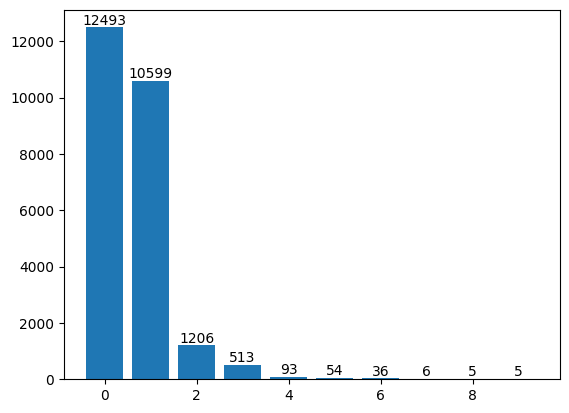

In [4]:
datas, label = df.drop(['hand'], axis = 1), df[['hand']]
label_count = label.value_counts('hand')

plt.bar(label_count.keys(), label_count.values)
for k, v in label_count.items():
    
    plt.text(
                k, v, v,
                verticalalignment   = 'bottom',
                horizontalalignment = 'center'
            )

In [5]:
label = label.to_numpy()

In [6]:
sum_suits = sum([datas.value_counts(f'S{idx}') for idx in range(1, 6)])
sum_ranks = sum([datas.value_counts(f'C{idx}') for idx in range(1, 6)])

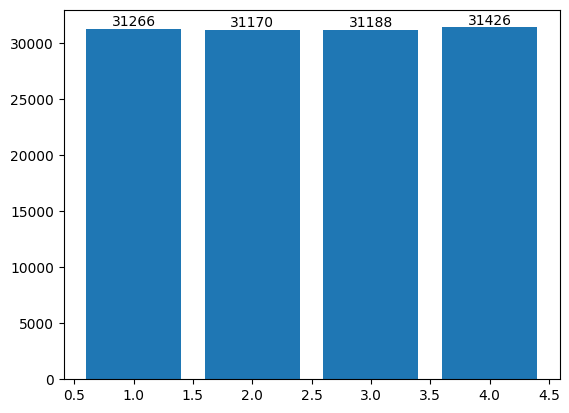

In [7]:
plt.bar(sum_suits.keys(), sum_suits.values)
for k, v in sum_suits.items():
    
    plt.text(
                k, v, v,
                verticalalignment   = 'bottom', 
                horizontalalignment = 'center'
            )

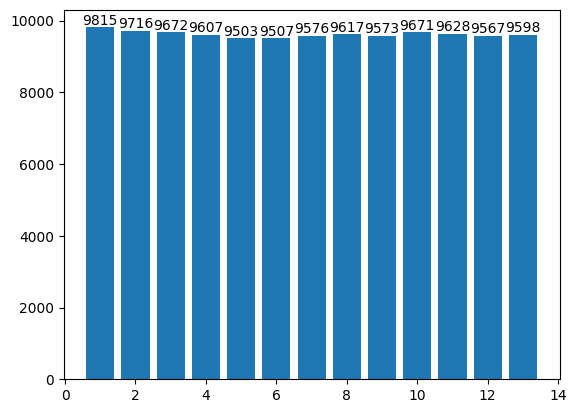

In [8]:
plt.bar(sum_ranks.keys(), sum_ranks.values)
for k, v in sum_ranks.items():
    
    plt.text(
                k, v, v,
                verticalalignment   = 'bottom', 
                horizontalalignment = 'center'
            )

In [9]:
new_data     = []
new_data_str = ''

encoder = LabelEncoder()

for data in datas.iterrows():
    
    _, series = data
    converted_data = [f'{idx2suit[series[f"S{idx}"]]}{series[f"C{idx}"]}' for idx in range(1, 6)]
    new_data.append(converted_data)

In [10]:
new_data[:5]

[['C9', 'S1', 'S2', 'C7', 'S8'],
 ['H4', 'D6', 'H12', 'D11', 'S7'],
 ['H11', 'C1', 'D7', 'C11', 'S1'],
 ['S9', 'S4', 'D6', 'H9', 'C9'],
 ['H8', 'S4', 'S11', 'S2', 'S1']]

In [11]:
new_data = np.array(new_data).reshape(-1, 1)

encoder = LabelEncoder()
encoder.fit(new_data)

encoded = encoder.transform(new_data)
encoded = encoded.reshape(-1, 5)

encoded.shape, label.shape

/opt/conda/envs/dove/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/dove/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


((25010, 5), (25010, 1))

In [12]:
train_x, test_x, train_y, test_y = train_test_split(encoded, label, test_size = 0.2, shuffle = True,
                                                    random_state = 42, stratify = label)

train_x,  val_x, train_y,  val_y = train_test_split(train_x, train_y, test_size = 0.2,
                                                    random_state = 42, stratify = train_y)

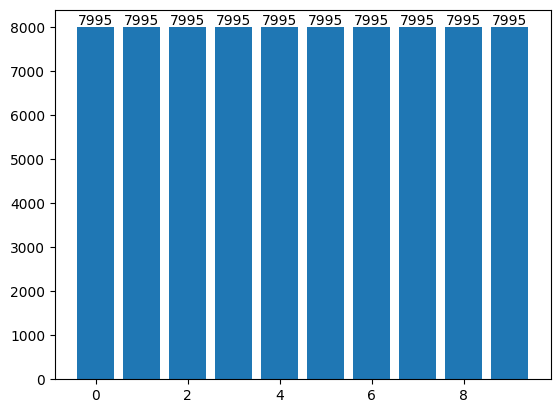

In [13]:
sampler      = SMOTE(random_state = 42, k_neighbors = 2)
smo_x, smo_y = sampler.fit_resample(train_x, train_y)

label_cnt = Counter(smo_y.tolist())
plt.bar(label_cnt.keys(), label_cnt.values())

for k, v in label_cnt.items():
    
    plt.text(k, v, v,
             verticalalignment   = 'bottom',
             horizontalalignment = 'center' 
            )

In [14]:
clf = SVC(C = 50)
clf.fit(smo_x, smo_y)

SVC(C=50)

In [15]:
preds = clf.predict(test_x)
print(metrics.classification_report(test_y, preds))
metrics.accuracy_score(test_y, preds)

              precision    recall  f1-score   support

           0       0.52      0.34      0.41      2499
           1       0.43      0.28      0.34      2120
           2       0.06      0.26      0.10       241
           3       0.02      0.11      0.03       102
           4       0.00      0.00      0.00        19
           5       0.45      0.45      0.45        11
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         1
           8       0.25      1.00      0.40         1
           9       0.00      0.00      0.00         1

    accuracy                           0.31      5002
   macro avg       0.17      0.24      0.17      5002
weighted avg       0.45      0.31      0.36      5002



0.30607756897241106

In [16]:
preds = clf.predict(val_x)
print(metrics.classification_report(val_y, preds))
metrics.accuracy_score(val_y, preds)

              precision    recall  f1-score   support

           0       0.52      0.34      0.41      1999
           1       0.43      0.29      0.35      1696
           2       0.07      0.31      0.11       193
           3       0.01      0.10      0.03        82
           4       0.00      0.00      0.00        15
           5       0.50      0.62      0.56         8
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.50      1.00      0.67         1

    accuracy                           0.31      4002
   macro avg       0.20      0.27      0.21      4002
weighted avg       0.45      0.31      0.36      4002



0.31084457771114443

In [17]:
train_x, test_x, train_y, test_y = train_test_split(encoded, label, test_size = 0.2, shuffle = True,
                                                    random_state = 42, stratify = label)

train_x,  val_x, train_y,  val_y = train_test_split(train_x, train_y, test_size = 0.2,
                                                    random_state = 42, stratify = train_y)

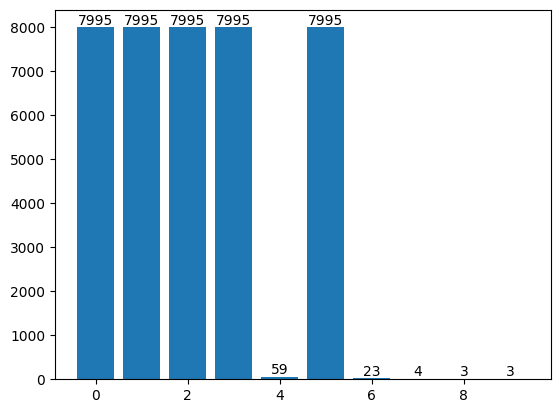

In [18]:
sampler      = BorderlineSMOTE(random_state = 42, k_neighbors = 2)
bdl_x, bdl_y = sampler.fit_resample(train_x, train_y)

label_cnt = Counter(bdl_y.tolist())
plt.bar(label_cnt.keys(), label_cnt.values())

for k, v in label_cnt.items():
    
    plt.text(k, v, v,
             verticalalignment   = 'bottom',
             horizontalalignment = 'center' 
            )

In [19]:
clf = SVC(C = 50)
clf.fit(bdl_x, bdl_y)

SVC(C=50)

In [20]:
preds = clf.predict(test_x)
print(metrics.classification_report(test_y, preds))
metrics.accuracy_score(test_y, preds)

              precision    recall  f1-score   support

           0       0.52      0.39      0.45      2499
           1       0.42      0.39      0.41      2120
           2       0.06      0.20      0.09       241
           3       0.01      0.03      0.01       102
           4       0.00      0.00      0.00        19
           5       0.38      0.55      0.44        11
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.37      5002
   macro avg       0.14      0.16      0.14      5002
weighted avg       0.44      0.37      0.40      5002



/opt/conda/envs/dove/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/dove/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/dove/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.3746501399440224

In [21]:
preds = clf.predict(val_x)
print(metrics.classification_report(val_y, preds))
metrics.accuracy_score(val_y, preds)

              precision    recall  f1-score   support

           0       0.54      0.40      0.46      1999
           1       0.44      0.41      0.42      1696
           2       0.05      0.18      0.08       193
           3       0.02      0.07      0.04        82
           4       0.00      0.00      0.00        15
           5       0.60      0.75      0.67         8
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.38      4002
   macro avg       0.17      0.18      0.17      4002
weighted avg       0.46      0.38      0.41      4002



/opt/conda/envs/dove/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/dove/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/dove/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.3843078460769615

In [22]:
from sklearn.model_selection import cross_validate
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction
import lightgbm as lgbm

In [23]:
def SVC_cv(C):
    
    model   = SVC(C = C)
    scoring = {'accuracy' : metrics.make_scorer(metrics.accuracy_score)}
    result  = cross_validate(model, bdl_x, bdl_y, cv= 5, scoring = scoring)
    
    return result['test_accuracy'].mean()

In [24]:
pbounds  = { 'C' : (25, 150) }
optimizer = BayesianOptimization(f      = SVC_cv, pbounds = pbounds,
                                verbose = 2, random_state = 42) 

optimizer.maximize()

|   iter    |  target   |     C     |
-------------------------------------


/opt/conda/envs/dove/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


| 1         | 0.7329    | 71.82     |


/opt/conda/envs/dove/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


| 2         | 0.7415    | 143.8     |


/opt/conda/envs/dove/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


| 3         | 0.7391    | 116.5     |


/opt/conda/envs/dove/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


| 4         | 0.7373    | 99.83     |


/opt/conda/envs/dove/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


| 5         | 0.7245    | 44.5      |


/opt/conda/envs/dove/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


| 6         | 0.7425    | 150.0     |


/opt/conda/envs/dove/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


NotUniqueError: Data point [150.] is not unique. You can set "allow_duplicate_points=True" to avoid this error